In [1]:
#first, we install the libraries
import pandas as pd     #to handle dataframes
import numpy as np      #for maths operations
import matplotlib.pyplot as plt     #for plotting
!pip install seaborn
import seaborn as sns   #for easier manipulation of data plotting and visualization

In [2]:
#read in data into a dataframe 
df = pd.read_csv('https://query.data.world/s/5dpnyov52z2lsghtptp4v6n473tm6l')
#print original data. check  matrix info
df

,Item,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,TOTAL,-35876109830,-39280825289,-45849692767,-50567215101,-47922933506,-44744392499,-42991317994,-28191895873,-34295148642,-49390148480,-60422803955,-66978434378,-74808561932,-74849665112,-64865434126
1,994--Estimated Low Value Shipments,623484621,678119775,695549518,741823127,944869594,1108320259,1270847697,1010225443,1535328229,1141837603,1094869804,1061840204,1096943222,1115401191,1110454100
2,992--EXPORTS NOT OVER $10;000(TO 3/98) $20;000...,15113368,8010114,4729046,4994816,3002118,2235615,888789,0,0,0,0,0,0,0,0
3,984--Estimate Of Low Valued Import Transactions,-1172025052,-1312534635,-1487019545,-1633399445,-1718387557,-1827305897,-1910014121,-1382495729,-943830629,-1060704872,-982543139,-966186434,-1403556177,-1402435613,-1382227006
4,971--Gold; Nonmonetary,17811824,27014109,14962071,129760760,166616887,233025975,289103793,115709526,301993558,271600143,242058414,456799215,217264765,65091374,90565147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,017--Meat & Edible Offal; Prepared Or Preserved,232697,587111,372075,-195323,-345740,1073217,378413,1069136,1232956,4042398,4293856,3834191,5842935,4982928,-2868839
261,016--Meat & Edible Offal; Salted; Dried; or Sm...,-2926633,-3535514,-4199496,-4552923,-4932715,-2953140,-3141828,-3230454,-3365269,-4229613,-3355731,-3655768,-3988141,-2497766,-2574818
262,012--Other Meat & Edible Offal,7058957,13428973,4087996,8752184,6336684,5950410,9471908,5700577,5573072,6855249,6892779,6655262,5289910,5416925,2871871
263,011--Meat Of Bovine Animals,3108613,2365935,3267623,3874812,3862743,5550502,11033788,5960413,13289911,21634983,32813301,35029608,35120544,33279257,25012048


In [3]:
#transform dataset. Make all years appear into a column
newdf=pd.melt(df, id_vars = 'Item',var_name='Year', value_name ='No of Transactions')
#print new data format to check result
newdf

,Item,Year,No of Transactions
0,TOTAL,2002,-35876109830
1,994--Estimated Low Value Shipments,2002,623484621
2,992--EXPORTS NOT OVER $10;000(TO 3/98) $20;000...,2002,15113368
3,984--Estimate Of Low Valued Import Transactions,2002,-1172025052
4,971--Gold; Nonmonetary,2002,17811824
...,...,...,...
3970,017--Meat & Edible Offal; Prepared Or Preserved,2016,-2868839
3971,016--Meat & Edible Offal; Salted; Dried; or Sm...,2016,-2574818
3972,012--Other Meat & Edible Offal,2016,2871871
3973,011--Meat Of Bovine Animals,2016,25012048


In [4]:
#as no. of transactions values are huge, we will be expressing them in 'per million'
newdf["No of Transactions"]=newdf["No of Transactions"]/1000000
#and the values are rounded to one decimal point only
newdf=newdf.round(1)
#print again to check result and see matrix info
newdf

,Item,Year,No of Transactions
0,TOTAL,2002,-35876.1
1,994--Estimated Low Value Shipments,2002,623.5
2,992--EXPORTS NOT OVER $10;000(TO 3/98) $20;000...,2002,15.1
3,984--Estimate Of Low Valued Import Transactions,2002,-1172.0
4,971--Gold; Nonmonetary,2002,17.8
...,...,...,...
3970,017--Meat & Edible Offal; Prepared Or Preserved,2016,-2.9
3971,016--Meat & Edible Offal; Salted; Dried; or Sm...,2016,-2.6
3972,012--Other Meat & Edible Offal,2016,2.9
3973,011--Meat Of Bovine Animals,2016,25.0


In [5]:
#the "Item"=TOTAl rows are of no interest for a comparison of specific items ==> get rid of them
indexNames = newdf[newdf['Item'] == "TOTAL"].index 
newdf.drop(indexNames , inplace=True)
#print info to check these values have been dropped
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 1 to 3974
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item                3960 non-null   object 
 1   Year                3960 non-null   object 
 2   No of Transactions  3960 non-null   float64
dtypes: float64(1), object(2)
memory usage: 123.8+ KB
None


In [6]:
#print dataframe to check result
newdf

,Item,Year,No of Transactions
1,994--Estimated Low Value Shipments,2002,623.5
2,992--EXPORTS NOT OVER $10;000(TO 3/98) $20;000...,2002,15.1
3,984--Estimate Of Low Valued Import Transactions,2002,-1172.0
4,971--Gold; Nonmonetary,2002,17.8
5,961--Coin (Other Than Gold Coin),2002,-0.7
...,...,...,...
3970,017--Meat & Edible Offal; Prepared Or Preserved,2016,-2.9
3971,016--Meat & Edible Offal; Salted; Dried; or Sm...,2016,-2.6
3972,012--Other Meat & Edible Offal,2016,2.9
3973,011--Meat Of Bovine Animals,2016,25.0


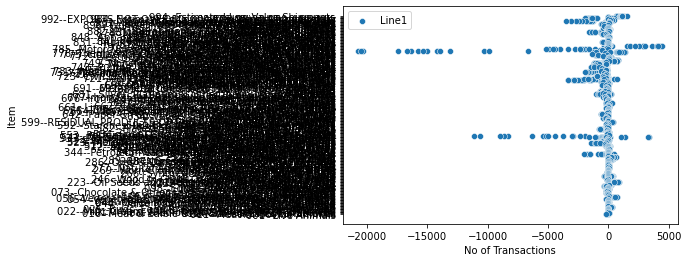

In [7]:
#plot entire dataframe for quick initial visualization of data 
sns.scatterplot(x ='No of Transactions', y ='Item', data = newdf, palette ='plasma')
#and initial trial at legend format
plt.legend(labels=["Line1","Line2", "Line3", "Line4", "Line5", "Line6", "Line7", "Line8"])

In [8]:
#centered investigation of data around key word vehicle. Avoid using the 'v' to avoid potential issues with capital letter 'V'
onlyv = newdf[newdf['Item'].str.contains('ehicle')]
#check result
print (onlyv)

                                              Item  Year  No of Transactions
41    791--Railway Vehicles & Associated Equipment  2002              -114.6
44    784--Parts And Accessories Of Motor Vehicles  2002             -1097.6
45                        783--Road Motor Vehicles  2002                 1.1
46             782--Special Purpose Motor Vehicles  2002              -125.3
47                         781--All Motor Vehicles  2002            -15018.4
...                                            ...   ...                 ...
3751  791--Railway Vehicles & Associated Equipment  2016               -43.7
3754  784--Parts And Accessories Of Motor Vehicles  2016             -4561.0
3755                      783--Road Motor Vehicles  2016               -22.9
3756           782--Special Purpose Motor Vehicles  2016              -484.0
3757                       781--All Motor Vehicles  2016            -15352.8

[75 rows x 3 columns]


In [9]:
#not interested in railway vehicles ==> drop this item
indexNames = onlyv[onlyv['Item'] == "791--Railway Vehicles & Associated Equipment"].index 
onlyv.drop(indexNames , inplace=True)
#check result
print(onlyv)

                                              Item  Year  No of Transactions
44    784--Parts And Accessories Of Motor Vehicles  2002             -1097.6
45                        783--Road Motor Vehicles  2002                 1.1
46             782--Special Purpose Motor Vehicles  2002              -125.3
47                         781--All Motor Vehicles  2002            -15018.4
309   784--Parts And Accessories Of Motor Vehicles  2003             -1670.4
310                       783--Road Motor Vehicles  2003               -28.6
311            782--Special Purpose Motor Vehicles  2003               -44.6
312                        781--All Motor Vehicles  2003            -15770.0
574   784--Parts And Accessories Of Motor Vehicles  2004             -1962.0
575                       783--Road Motor Vehicles  2004               -81.7
576            782--Special Purpose Motor Vehicles  2004               -79.9
577                        781--All Motor Vehicles  2004            -16328.2

C:\Users\ReDI\AppData\Local\Temp\ipykernel_6448\2622078249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlyv.drop(indexNames , inplace=True)


<AxesSubplot:xlabel='Year', ylabel='No of Transactions'>

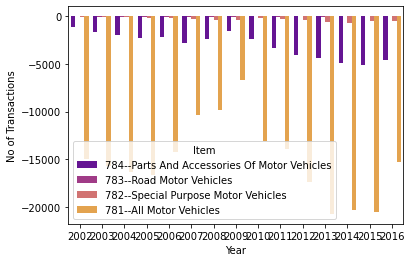

In [10]:
#use Seaborn to plot bars for these items
sns.barplot(x ='Year', y ='No of Transactions', hue='Item', data = onlyv, palette ='plasma')

In [11]:
#import plotly.express as px
#prueba1=sns.barplot(x ='Year', y ='No of Transactions', hue='Item', data = onlyv, palette ='plasma')
#div = prueba1.to_html(full_html=False) 

In [12]:
#!pip install bokeh
#from bokeh.plotting import figure, show, save, output_file
#from bokeh.models import Legend, LegendItem

In [13]:
#prueba1=sns.barplot(x ='Year', y ='No of Transactions', hue='Item', data = onlyv, palette ='plasma')
#output_file(filename="custom_filename.html", title="Static HTML file")
#save(prueba1)

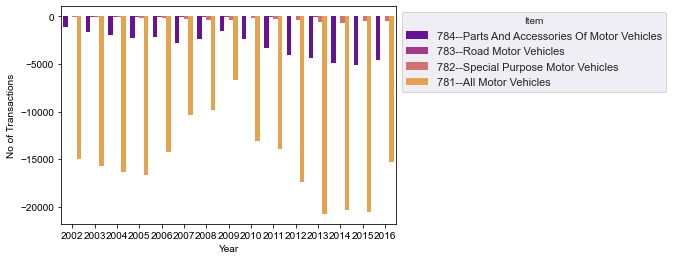

In [14]:
#define the legend
graphoutlegend=sns.barplot(x ='Year', y ='No of Transactions', hue='Item', data = onlyv, palette ='plasma')
#define figure size
sns.set(rc={"figure.figsize":(16, 8)}) #width=8, height=4
#move legend outside
sns.move_legend(graphoutlegend, "upper left", bbox_to_anchor=(1, 1))

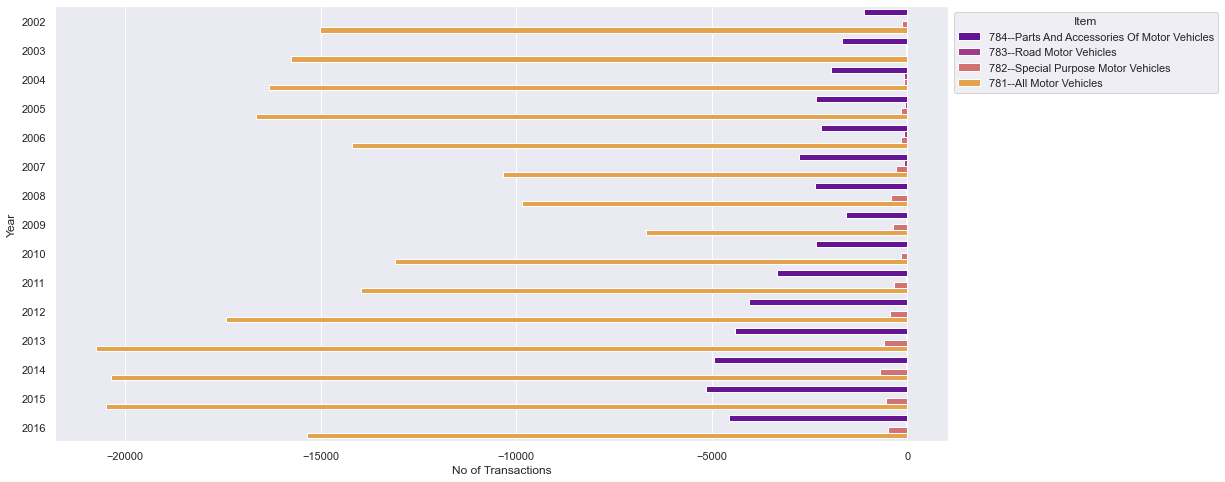

In [15]:
def viewinhtml():
    #swap x and y axis for better visualization
    graphoutlegend=sns.barplot(x ='No of Transactions', y ='Year', hue='Item', data = onlyv, palette ='plasma')
    #define figure size
    #sns.set(rc={"figure.figsize":(8, 16)}) #width=8, height=4
    sns.set(rc={"figure.figsize":(16, 32)})
    #move legend outside
    sns.move_legend(graphoutlegend, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig('US-DE Balance.png', dpi=100) #can add outside colour with , facecolor = 'red'
    #bbox_extra_artists=(legend_outside,), bbox_inches='tight')
viewinhtml()